In [1]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")

NOTE: This notebook ended up being a bit messy for exercise 1b. Apologies

# a - Exact Solution vs Truncated Fourier Series

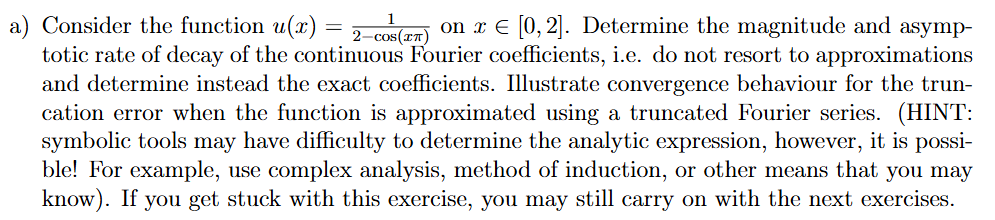

## Complex Coefficient Formula

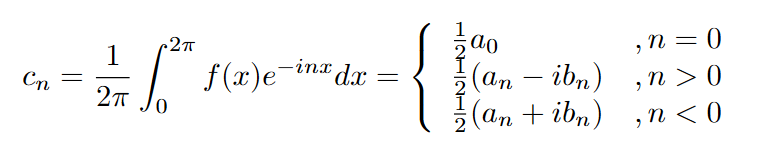

$$
u(x) = \frac{1}{2-\cos(πx)} \quad\quad x ∈ [0, 2]
$$

Known Solution

$$
C_n = \frac{1}{\sqrt{3}(2+\sqrt{3})^{|n|}}
$$

Solve this by the Residue Theorem

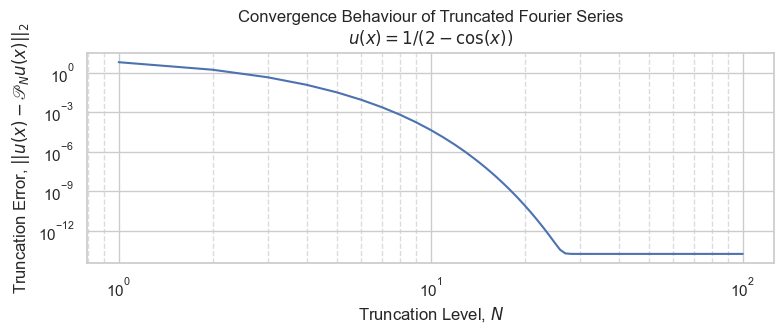

In [3]:
def C_n(n):
    quot = np.sqrt(3) * (2 + np.sqrt(3)) ** np.abs(n)
    return 1 / quot


def u(x):
    return 1.0 / (2.0 - np.cos(x))


x = np.linspace(0, 2 * np.pi, 10000)
y_exact = u(x)


# Ns = [10, 50, 100, 300, 1000, 3000, 10000]
Ns = [1, 3, 10, 30, 100, 300]
Ns = np.geomspace(1, 100, 200, dtype=int)
Ns = np.arange(1, 101)
errors = []

for N in Ns:
    y_trunc = np.zeros_like(x, dtype="complex")
    for n in range(-N, N + 1):
        y_trunc += C_n(n) * np.exp(1j * n * x)

    residual = y_exact - y_trunc
    errors.append(np.linalg.norm(residual))
    # y_trunc = np.real(y_trunc)
# plt.plot(x, y_trunc)
# plt.plot(x, y_exact)

plt.figure(figsize=(8, 3.5))
plt.title(
    "Convergence Behaviour of Truncated Fourier Series\n$u(x) = 1 / (2 - \\cos(x))$"
)
plt.xlabel("Truncation Level, $N$")
plt.ylabel("Truncation Error, $||u(x) - 𝒫︀_N u(x)||_2$")
plt.loglog(Ns, errors)
plt.grid(True, which="minor", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("report/output/1a_fourier_truncation_convergence.png", dpi=600)


# b - DFT

c:\Users\jeppe\Documents\MEGA\Base\DTU\02689 Advanced Numerical Methods\Assignments\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jeppe\Documents\MEGA\Base\DTU\02689 Advanced Numerical Methods\Assignments\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


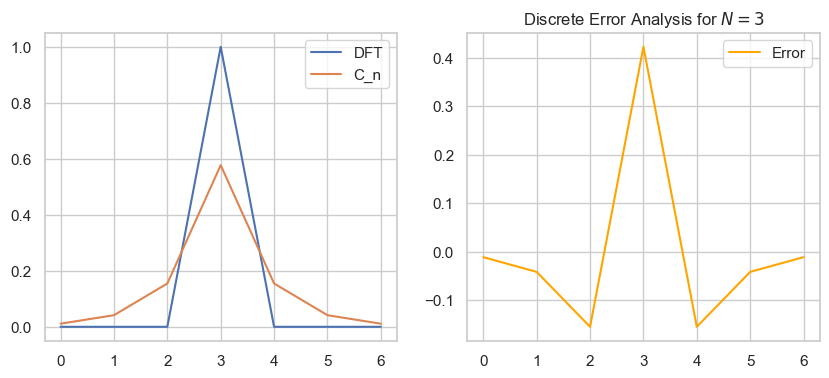

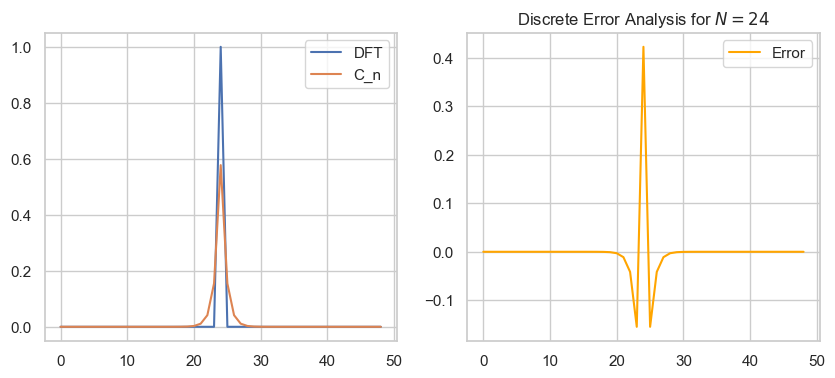

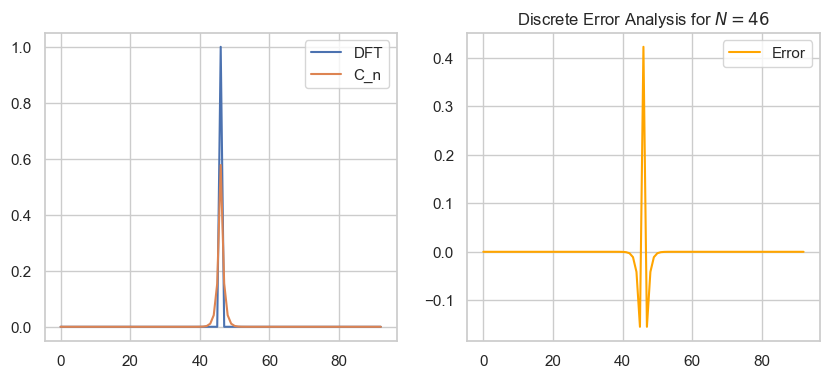

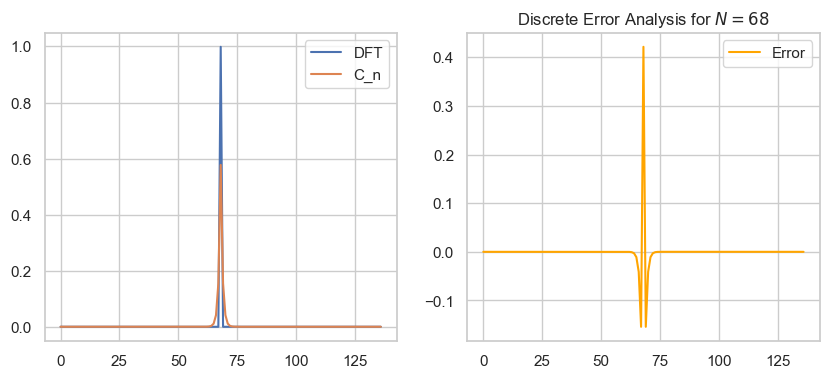

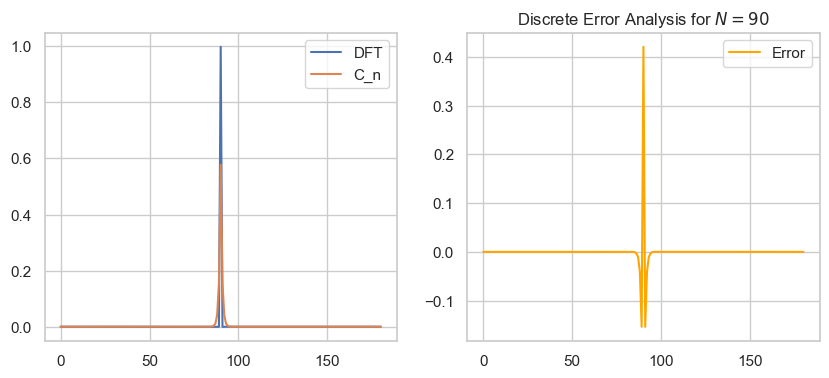

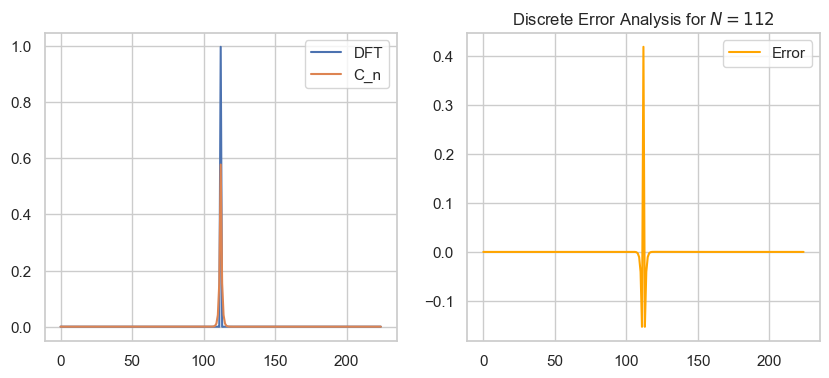

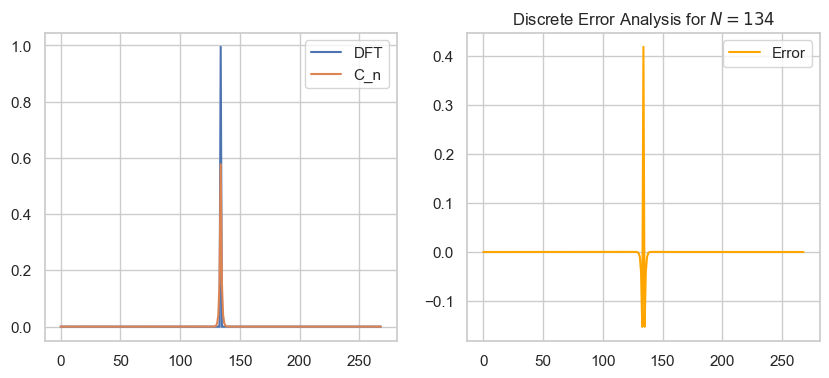

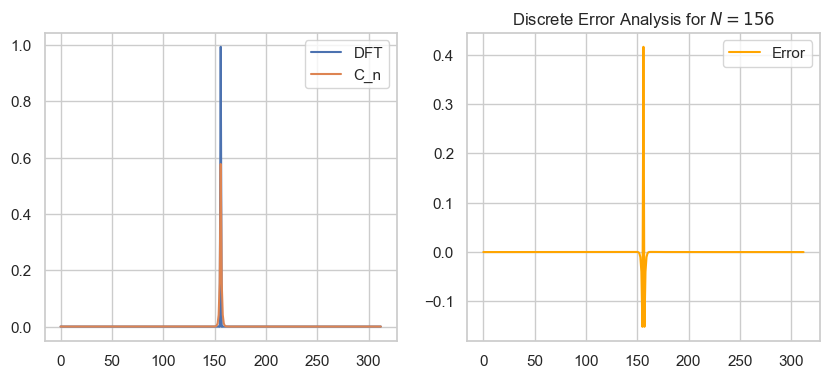

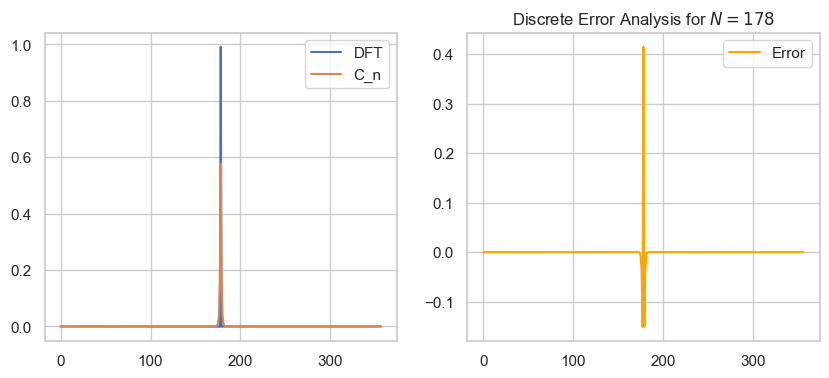

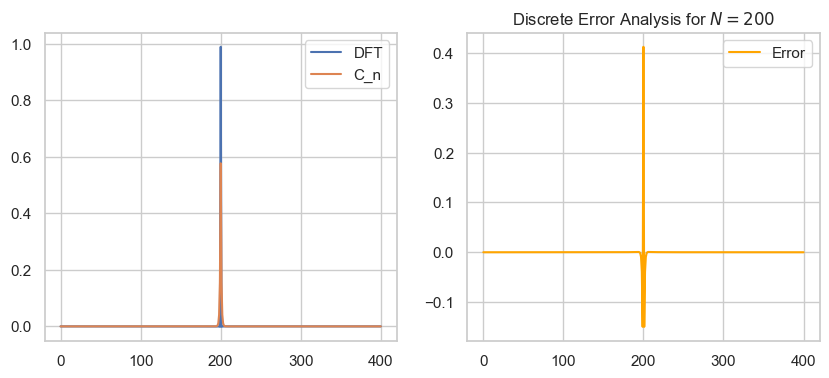

In [4]:
N = 25

Ns = np.linspace(3, 200, 10, dtype=int)

for N in Ns:
    dft_components = np.fft.fftshift(np.fft.fft(y_exact, n=2 * N + 1, norm="forward"))
    Ns = np.arange(-N, N + 1)
    Cn_components = list(map(C_n, Ns))

    errors = np.abs(dft_components) - np.abs(Cn_components)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
    ax1.plot(dft_components, label="DFT")
    ax1.plot(list(map(C_n, np.arange(-N, N + 1))), label="C_n")
    ax1.legend()

    ax2.plot(errors, label="Error", color="orange")
    ax2.legend()

    plt.title(f"Discrete Error Analysis for $N={N}$")
    # ax2.legend()


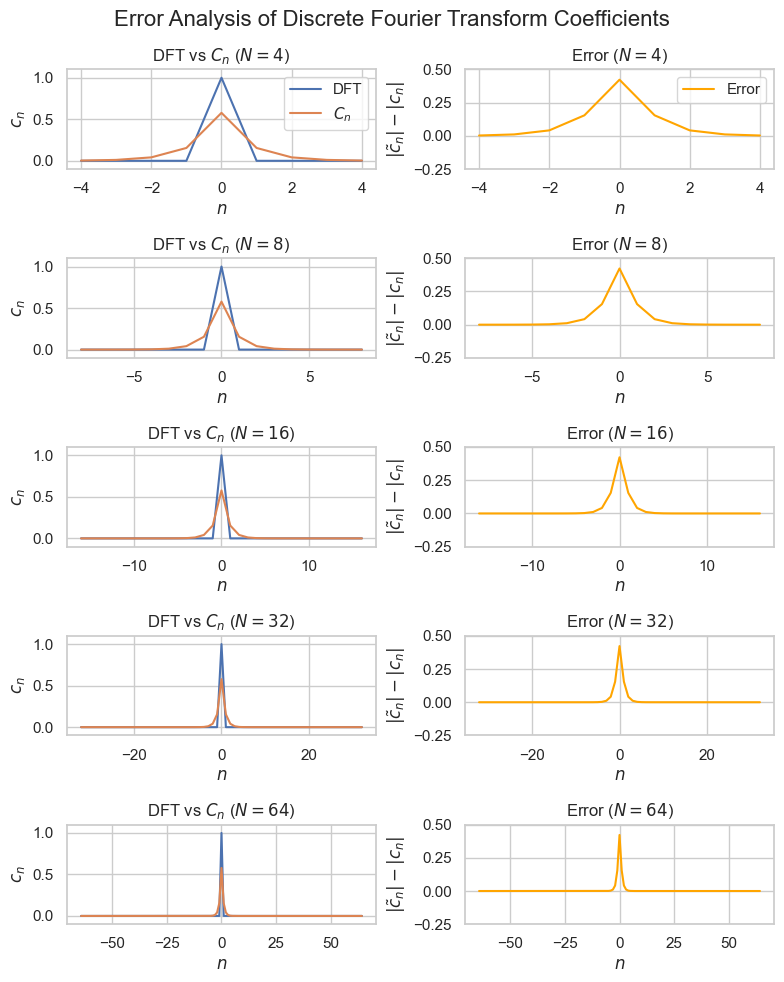

In [5]:
Ns = [4, 8, 16, 32, 64]

fig, axes = plt.subplots(len(Ns), 2, figsize=(8, 2 * len(Ns)))

for idx, N in enumerate(Ns):
    dft_components = np.fft.fftshift(np.fft.fft(y_exact, n=2 * N + 1, norm="forward"))
    n_range = np.arange(-N, N + 1)
    Cn_components = list(map(C_n, n_range))

    errors = np.abs(dft_components - Cn_components)

    ax1, ax2 = axes[idx]
    ax1.plot(n_range, np.abs(dft_components), label="DFT")
    ax1.plot(n_range, np.abs(Cn_components), label="$C_n$")
    ax1.set_title(f"DFT vs $C_n$ ($N={N}$)")
    ax1.set_xlabel("$n$")
    ax1.set_ylabel("$c_n$")
    ax1.set_ylim(-0.1, 1.1)

    ax2.plot(n_range, errors, label="Error", color="orange")
    ax2.set_title(f"Error ($N={N}$)")
    ax2.set_xlabel("$n$")
    ax2.set_ylabel("$|\\tilde{c}_n| - |c_n|$")
    ax2.set_ylim(-0.25, 0.5)

    if idx == 0:
        ax1.legend()
        ax2.legend()
plt.suptitle("Error Analysis of Discrete Fourier Transform Coefficients", fontsize=16)
plt.tight_layout()
# plt.savefig("report/output/1b_fourier_dft_error_analysis.png", dpi=600)

64
[-0.5      -0.484375 -0.46875  -0.453125 -0.4375   -0.421875 -0.40625
 -0.390625 -0.375    -0.359375 -0.34375  -0.328125 -0.3125   -0.296875
 -0.28125  -0.265625 -0.25     -0.234375 -0.21875  -0.203125 -0.1875
 -0.171875 -0.15625  -0.140625 -0.125    -0.109375 -0.09375  -0.078125
 -0.0625   -0.046875 -0.03125  -0.015625  0.        0.015625  0.03125
  0.046875  0.0625    0.078125  0.09375   0.109375  0.125     0.140625
  0.15625   0.171875  0.1875    0.203125  0.21875   0.234375  0.25
  0.265625  0.28125   0.296875  0.3125    0.328125  0.34375   0.359375
  0.375     0.390625  0.40625   0.421875  0.4375    0.453125  0.46875
  0.484375]
32
[-0.5     -0.46875 -0.4375  -0.40625 -0.375   -0.34375 -0.3125  -0.28125
 -0.25    -0.21875 -0.1875  -0.15625 -0.125   -0.09375 -0.0625  -0.03125
  0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875]
16
[-0.5    -0.4375 -0.375  -0.3125 -0.25   -0.1875 -0.125 

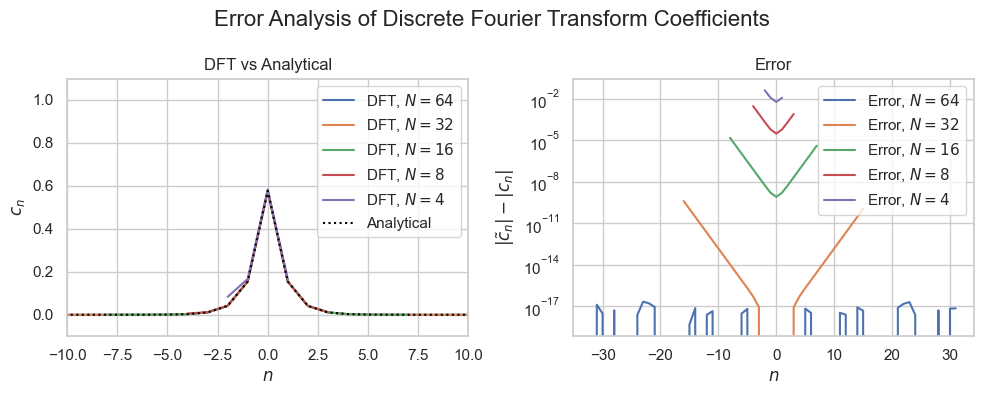

In [6]:
Ns = [4, 8, 16, 32, 64]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1 = axes[0]
ax2 = axes[1]

N_max = max(Ns)
n_max_range = np.arange(-N_max, N_max + 1)
C_n_components = list(map(C_n, np.arange(-N_max, N_max + 1)))

x = np.linspace(0, 2 * np.pi, 100)
y_exact = u(x)

for idx, N in enumerate(Ns[::-1]):
    x_n = np.linspace(0, 2 * np.pi, N, endpoint=False)
    y_n = u(x_n)
    assert len(x_n) == N
    print(N)
    dft_components = np.fft.fftshift(np.fft.fft(y_n, norm="forward"))
    assert len(dft_components) == N
    print(np.fft.fftshift(np.fft.fftfreq(N)))
    n_range = np.arange(-N, N + 1)
    n_range = np.arange(-N // 2, N // 2)
    assert len(n_range) == N
    Cn_components = list(map(C_n, n_range))

    errors = np.abs(dft_components) - np.abs(Cn_components)

    ax1.plot(n_range, np.abs(dft_components), label=f"DFT, $N={N}$")
    # ax1.plot(n_range, np.abs(Cn_components), label="$C_n$")
    ax1.set_title("DFT vs Analytical")
    ax1.set_xlabel("$n$")
    ax1.set_ylabel("$c_n$")
    ax1.set_ylim(-0.1, 1.1)

    ax2.plot(n_range, errors, label=f"Error, $N={N}$")
    ax2.set_title("Error")
    ax2.set_xlabel("$n$")
    ax2.set_ylabel("$|\\tilde{c}_n| - |c_n|$")
    # ax2.set_ylim(-0.25, 0.5)

    # if idx == 0:

ax1.plot(n_max_range, C_n_components, label="Analytical", color="black", ls=":")

ax1.legend()
ax2.legend()
N_lim = 10
ax1.set_xlim(-N_lim, N_lim)
ax2.set_yscale("log")
# ax2.set_xlim(-N_lim, N_lim)
# Plot C_n at the end

plt.suptitle("Error Analysis of Discrete Fourier Transform Coefficients", fontsize=16)
plt.tight_layout()
# plt.savefig("report/output/1b_fourier_dft_error_analysis.png", dpi=600)

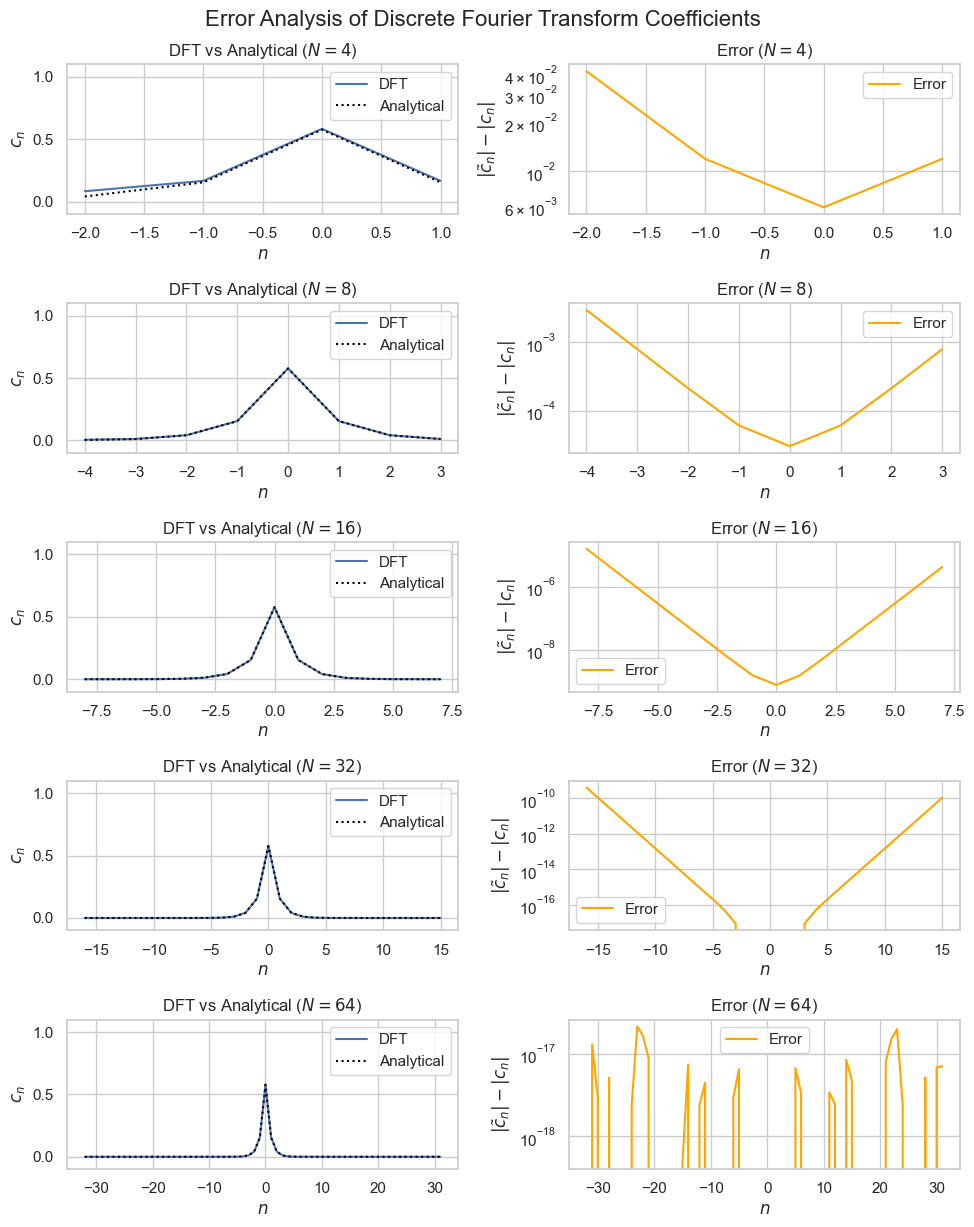

In [7]:
Ns = [4, 8, 16, 32, 64]
x = np.linspace(0, 2 * np.pi, 100)

fig, axes = plt.subplots(len(Ns), 2, figsize=(10, 2.5 * len(Ns)))


def C_n(n):
    quot = np.sqrt(3) * (2 + np.sqrt(3)) ** np.abs(n)
    return 1 / quot


def u(x):
    return 1.0 / (2.0 - np.cos(x))


convergence_data = []
for idx, N in enumerate(Ns):
    x_n = np.linspace(0, 2 * np.pi, N, endpoint=False)
    y_n = u(x_n)
    dft_components = np.fft.fftshift(np.fft.fft(y_n, norm="forward"))
    n_range = np.arange(-N // 2, N // 2)
    Cn_components = list(map(C_n, n_range))
    errors = np.abs(dft_components) - np.abs(Cn_components)

    ax1, ax2 = axes[idx]
    ax1.plot(n_range, np.abs(dft_components), label="DFT")
    ax1.plot(n_range, np.abs(Cn_components), label="Analytical", color="black", ls=":")
    ax1.set_title(f"DFT vs Analytical ($N={N}$)")
    ax1.set_xlabel("$n$")
    ax1.set_ylabel("$c_n$")
    ax1.set_ylim(-0.1, 1.1)
    ax1.legend()

    ax2.plot(n_range, errors, label="Error", color="orange")
    ax2.set_title(f"Error ($N={N}$)")
    ax2.set_xlabel("$n$")
    ax2.set_ylabel(r"$|\tilde{c}_n| - |c_n|$")
    ax2.semilogy()
    ax2.legend()

    convergence_data.append(
        {
            "N": N,
            "n_range": n_range,
            "dft_magnitudes": np.abs(dft_components),
            "analytical_magnitudes": np.abs(Cn_components),
            "errors": errors,
        }
    )

plt.suptitle("Error Analysis of Discrete Fourier Transform Coefficients", fontsize=16)
plt.tight_layout()
# plt.savefig(
#     "report/output/1b_fourier_dft_error_analysis.png", dpi=600, bbox_inches="tight"
# )
plt.show()

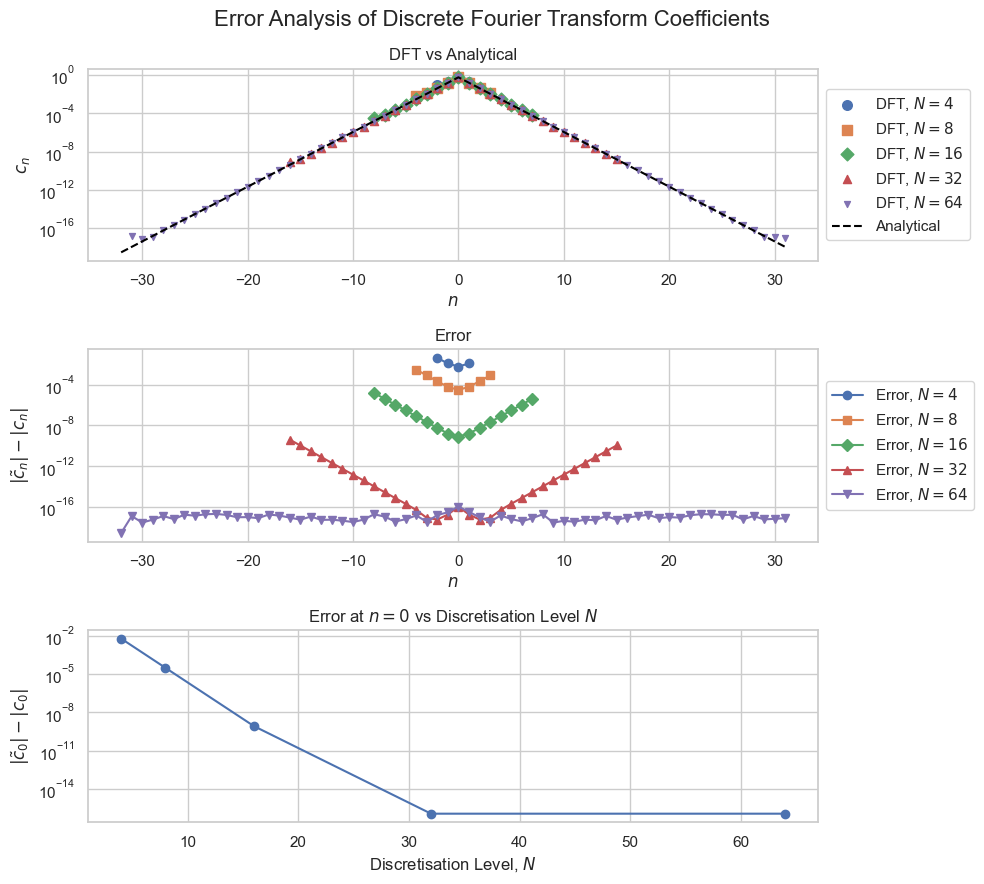

In [10]:
Ns = [4, 8, 16, 32, 64]
x = np.linspace(0, 2 * np.pi, 100)


# Redefine functions to ensure they are not overridden by other u
def C_n(n):
    quot = np.sqrt(3) * (2 + np.sqrt(3)) ** np.abs(n)
    return 1 / quot


def u(x):
    return 1.0 / (2.0 - np.cos(x))


convergence_data = []
for idx, N in enumerate(Ns):
    x_n = np.linspace(0, 2 * np.pi, N, endpoint=False)
    y_n = u(x_n)
    n_range = np.arange(-N // 2, N // 2)

    dft_components = np.fft.fftshift(np.fft.fft(y_n, norm="forward"))
    Cn_components = list(map(C_n, n_range))

    errors = np.abs(dft_components - Cn_components)

    n0_index = np.argmax(n_range == 0)
    error_n0 = errors[n0_index]

    convergence_data.append(
        {
            "N": N,
            "n_range": n_range,
            "dft_magnitudes": np.abs(dft_components),
            "analytical_magnitudes": np.abs(Cn_components),
            "errors": errors,
            "error_n0": error_n0,
        }
    )

fig, axes = plt.subplots(3, 1, figsize=(10, 9))
ax1, ax2, ax3 = axes
markers = ["o", "s", "D", "^", "v"]

# Plot 1: DFT vs Analytical
for datum, marker in zip(convergence_data, markers):
    ax1.scatter(
        datum["n_range"],
        datum["dft_magnitudes"],
        marker=marker,
        label=f"DFT, $N={datum['N']}$",
        s=50 - datum["N"] / 2,
        # alpha=0.6,
    )

# Plot analytical
ax1.plot(n_range, np.abs(Cn_components), label="Analytical", color="black", ls="--")

ax1.set_title("DFT vs Analytical")
ax1.set_xlabel("$n$")
ax1.set_ylabel("$c_n$")
ax1.semilogy()
ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Plot 2: Error
for datum, marker in zip(convergence_data, markers):
    ax2.plot(
        datum["n_range"],
        datum["errors"],
        label=f"Error, $N={datum['N']}$",
        marker=marker,
        ms=6,
    )
ax2.set_title("Error")
ax2.set_xlabel("$n$")
ax2.set_ylabel(r"$|\tilde{c}_n| - |c_n|$")
ax2.semilogy()
ax2.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Plot 3: Error at n=0 vs N
N_values = [datum["N"] for datum in convergence_data]
error_n0_values = [datum["error_n0"] for datum in convergence_data]
ax3.plot(N_values, error_n0_values, marker="o")
ax3.set_title("Error at $n=0$ vs Discretisation Level $N$")
ax3.set_xlabel("Discretisation Level, $N$")
ax3.set_ylabel("$|\\tilde{c}_0| - |c_0|$")
ax3.semilogy()

plt.suptitle("Error Analysis of Discrete Fourier Transform Coefficients", fontsize=16)
plt.tight_layout()
plt.savefig(
    "report/output/1b_fourier_dft_error_analysis.png", dpi=600, bbox_inches="tight"
)
plt.show()